*This project is created as part of a job application assessment for the role of a Data Analyst.*

# Introduction

MI.com is a website for accommodation booking, based in UK. It offers booking of all types of low-priced accommodations. Established in 2008, it started out small but now deals with about 500k bookings a day.

Customers use MI.com as an intermediary between themselves and their requested accommodation. Whenever customers have questions and decide to make a phone call, they can either directly call their hotel/apartments/etc or MI.com.

With about 500k bookings a day, even if only 1 in every 100 customers decides to pick up the phone for enquiry, it will result in 5k calls a day. With heavy fluctuations and a strong conjecture in the number of bookings, it is a difficult task to manage the call center capacity.

By now, MI.com has more than 10 years of experience. This means that the company has a lot of historic data about both the bookings and phone enquiries. Two datasets are provided as CSV files - `case_data_calls.csv` and `case_data_reservations.csv`.
The `case_data_calls.csv` relate to information on the number of calls received by the call center while the `case_data_reservations.csv` relate to information on the number of reservations made.
The Head of Call Center requested to use this set of data to improve the call center planning.

Based on my own interpretation, the data dictionary describing each column for each dataset is as follows since an accompanying data dictionary is not provided with the datasets.

**`case_data_calls.csv:`**

| Column Name | Description |
| ----------  | ----------- |
| date | Date for which the row relates to, unique |
| calls | The number of calls received by the call center |
| weekday | Day of the week, taking on integer values 1 to 7, corresponding to Monday through Sunday |

**`case_data_reservations.csv`**

| Column Name | Description |
| ----------  | ----------- |
| date | Date for which the row relates to, unique |
| reservations_2months_advance | The number of reservation bookings made for a stay with at least 2 months of advance period |
| total_reservations | The total number of reservation bookings made for a stay |
| summer_break | Whether the date falls within summer vacation period; 1 for summer vacation period else 0 |
| christmas_break | Whether the date falls within Christmas festive period; 1 for Christmas break else 0  |
| special_day | Indicator for whether the date is a special occassion such as other festive or public holiday |

# Exploratory Data Analysis

First, we would do some exploratory data analysis on both datasets separately first before combining them to build a predictive model to help the call center improve on their staffing planning.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline

## Calls

In [2]:
# setting up default date parser
parser = lambda date: dt.strptime(date, '%d-%m-%Y')

In [3]:
calls = pd.read_csv('case_data_calls.csv', sep=';', parse_dates=['date'], date_parser=parser)

In [4]:
calls

,date,calls,weekday
0,2013-01-01,2429,2
1,2013-01-02,3881,3
2,2013-01-03,3560,4
3,2013-01-04,3155,5
4,2013-01-05,1538,6
...,...,...,...
1150,2016-02-25,5690,4
1151,2016-02-26,5799,5
1152,2016-02-27,3949,6
1153,2016-02-28,2973,7


In [5]:
calls.dtypes

date       datetime64[ns]
calls               int64
weekday             int64
dtype: object

<AxesSubplot:xlabel='date', ylabel='calls'>

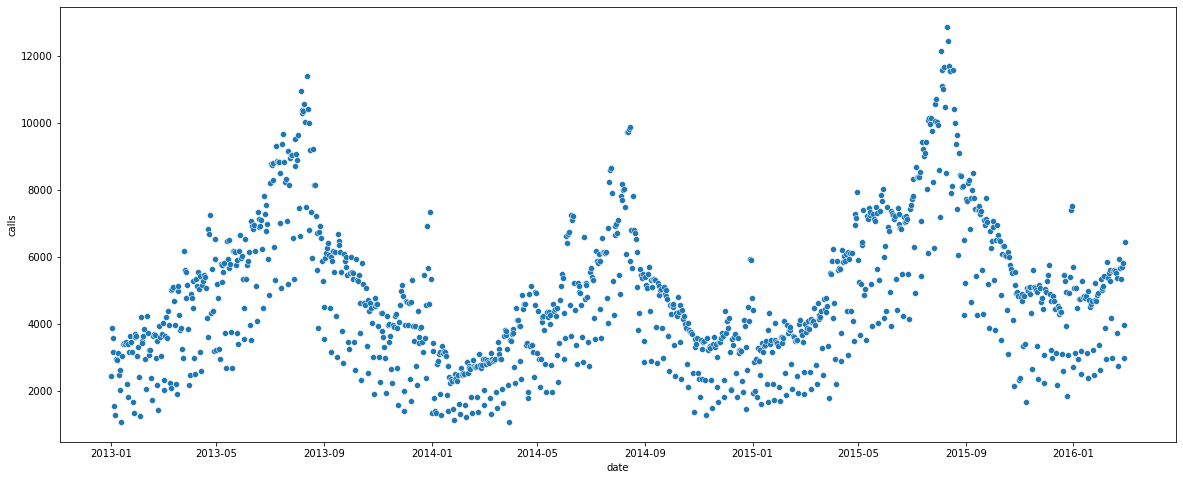

In [6]:
# Time series plot of the calls
fig, ax1 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='calls', data=calls, ax=ax1)

From the scatterplot, calls begin to rise steadily from January before peaking during August. Thereafter, calls begin to decline from September and reaching its lowest at the start of a new year in January. Overall, there is no clear general trend of increasing number of calls over the years 2013 to 2016.

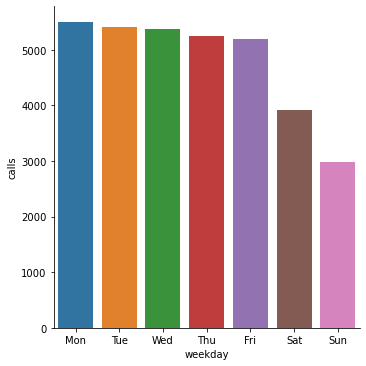

In [7]:
bar_fig = sns.catplot(x='weekday', y='calls', data=calls, kind='bar', ci=None)
bar_fig.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

From the bar plot, most calls come in at the start of the week and decreases as the week progress.

## Reservations

In [8]:
reservations = pd.read_csv('case_data_reservations.csv', sep=';', parse_dates=['date'], date_parser=parser)

In [9]:
reservations

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2014-01-01,1494,7794,0,1,1
1,2014-01-02,2891,20074,0,1,0
2,2014-01-03,2790,17905,0,1,0
3,2014-01-04,2504,10880,0,0,0
4,2014-01-05,1522,8333,0,0,0
...,...,...,...,...,...,...
785,2016-02-25,4713,33309,0,0,0
786,2016-02-26,5204,34350,0,0,0
787,2016-02-27,5135,23656,0,0,0
788,2016-02-28,3422,18162,0,0,0


In [10]:
reservations.dtypes

date                            datetime64[ns]
reservations_2months_advance             int64
total_reservations                       int64
summer_break                             int64
christmas_break                          int64
special_day                              int64
dtype: object

<AxesSubplot:xlabel='date', ylabel='total_reservations'>

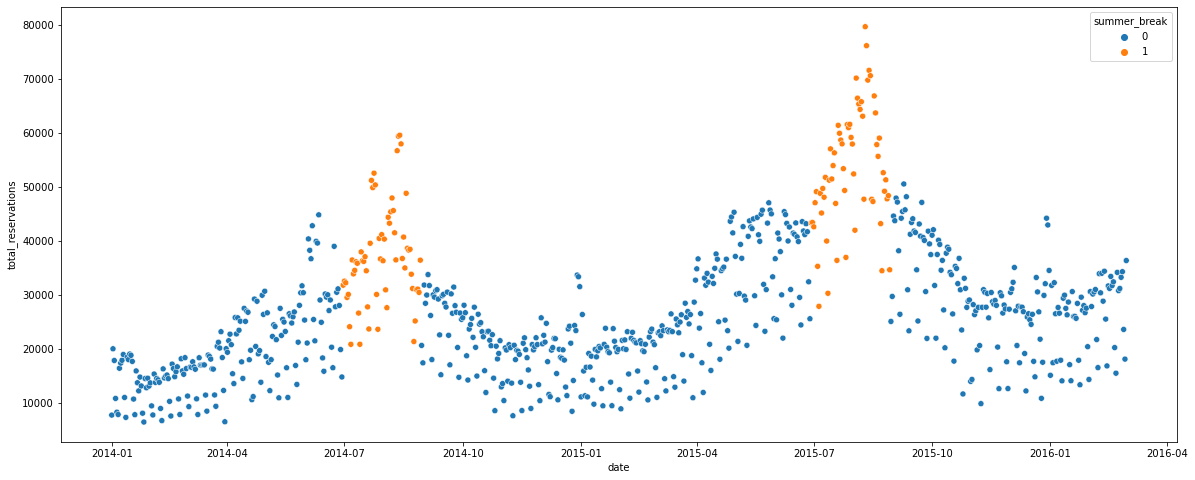

In [11]:
# Time series plot of the reservations, colour by summer_break
fig, ax2 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='total_reservations', data=reservations, ax=ax2, hue='summer_break')

<AxesSubplot:xlabel='date', ylabel='total_reservations'>

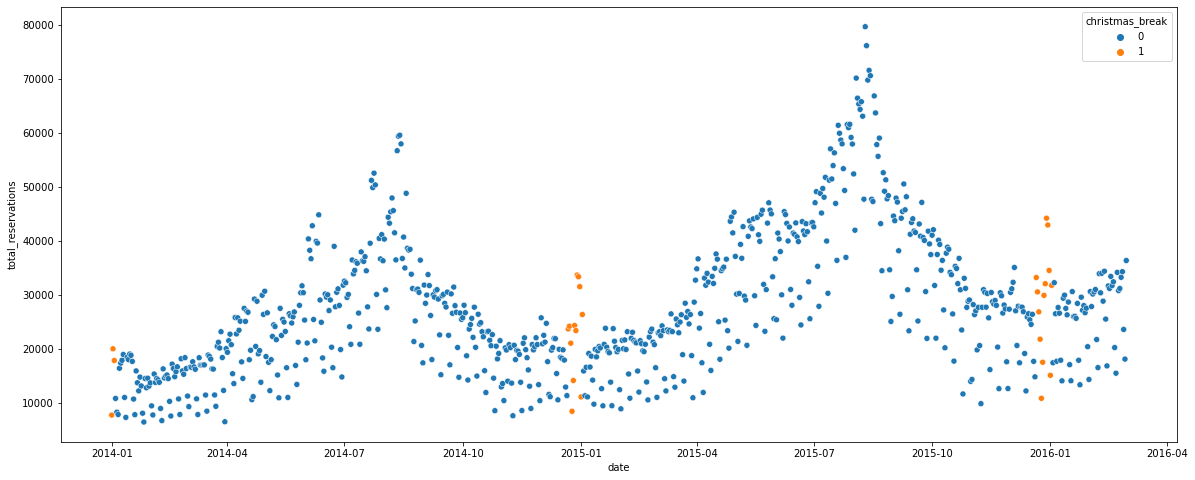

In [12]:
# Time series plot of the reservations, colour by christmas_break
fig, ax3 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='total_reservations', data=reservations, ax=ax3, hue='christmas_break')

The trend for the number of reservations is similar to the trend for the number of calls as examined earlier. Reservations begin to rise steadily from January before peaking during August. The peak correspond to the summer break period. Thereafter, calls begin to decline from September and reaching its lowest at the start of a new year in January. During the Christmas break, there is a slight spike in number of reservations despite being the number of reservations being relatively low during the period. The significance of this would be explored later.

Overall, there is no clear general trend of increasing number of reservations over the years 2014 to 2016.

<AxesSubplot:xlabel='date', ylabel='total_reservations'>

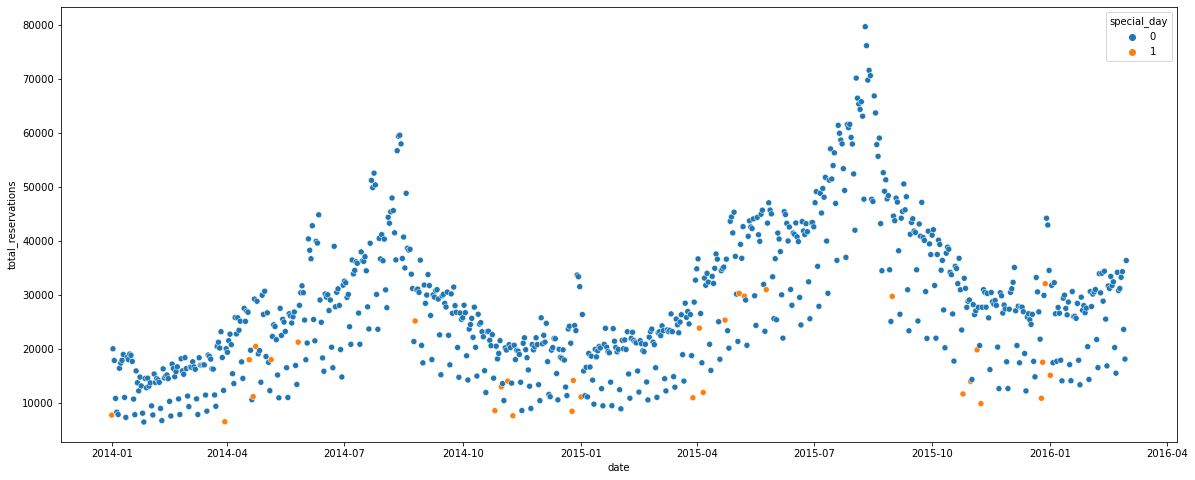

In [13]:
# Time series plot of the reservations, colour by special_day
fig, ax4 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='total_reservations', data=reservations, ax=ax4, hue='special_day')

The number of reservations made during a special day does not seem to vary much as compared to non-special days. We can conclude that whether a date is a special day does not seem to have much impact on the number of reservations made on the date.

The number of reservations made at least 2 months in advance must be highly correlated with the total number of reservations since it is a subset of the total. As such, the trends observed above for total number of reservations would be similarly observed for the number of observations made at least 2 months in advance.

# Data Cleaning

Before creating a predictive model for the number of calls, there is a need to combine the datasets and combine them into a single dataset. Data cleaning is then done to ensure the data is in the right format to be used for training and testing the model.

In [14]:
# Combining the two datasets
df = pd.merge(calls, reservations, how='left', on='date')

In [15]:
df

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,3881,3,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,3560,4,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,3155,5,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1538,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1150,2016-02-25,5690,4,4713.0,33309.0,0.0,0.0,0.0
1151,2016-02-26,5799,5,5204.0,34350.0,0.0,0.0,0.0
1152,2016-02-27,3949,6,5135.0,23656.0,0.0,0.0,0.0
1153,2016-02-28,2973,7,3422.0,18162.0,0.0,0.0,0.0


Rows with missing values would be dropped since the calls dataset begin from 2013 while the reservations dataset begin from 2014. Both datasets end on the same date.

In [16]:
df = df.dropna().reset_index(drop=True)

In [17]:
df

,date,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2014-01-01,1327,3,1494.0,7794.0,0.0,1.0,1.0
1,2014-01-02,3417,4,2891.0,20074.0,0.0,1.0,0.0
2,2014-01-03,3178,5,2790.0,17905.0,0.0,1.0,0.0
3,2014-01-04,1767,6,2504.0,10880.0,0.0,0.0,0.0
4,2014-01-05,1374,7,1522.0,8333.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
785,2016-02-25,5690,4,4713.0,33309.0,0.0,0.0,0.0
786,2016-02-26,5799,5,5204.0,34350.0,0.0,0.0,0.0
787,2016-02-27,3949,6,5135.0,23656.0,0.0,0.0,0.0
788,2016-02-28,2973,7,3422.0,18162.0,0.0,0.0,0.0


In [18]:
# Converting float columns back to int columns after dropping NaN values
df[df.select_dtypes(float).columns] = df.select_dtypes(float).astype(int)

# Checking `calls` relationships with respect to breaks

<AxesSubplot:xlabel='date', ylabel='calls'>

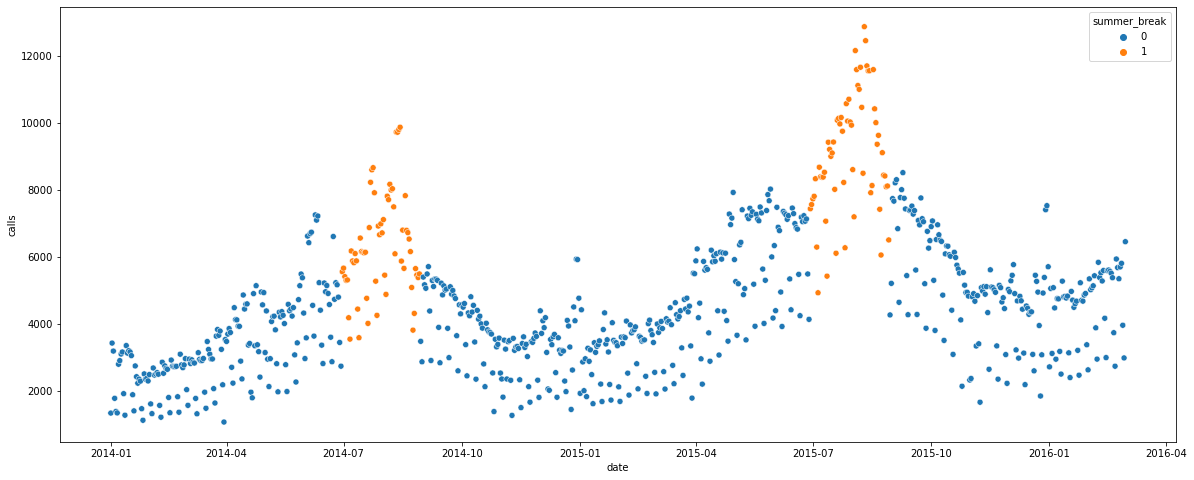

In [19]:
# Time series plot of the calls, colour by summer_break
fig, ax5 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='calls', data=df, ax=ax5, hue='summer_break')

<AxesSubplot:xlabel='date', ylabel='calls'>

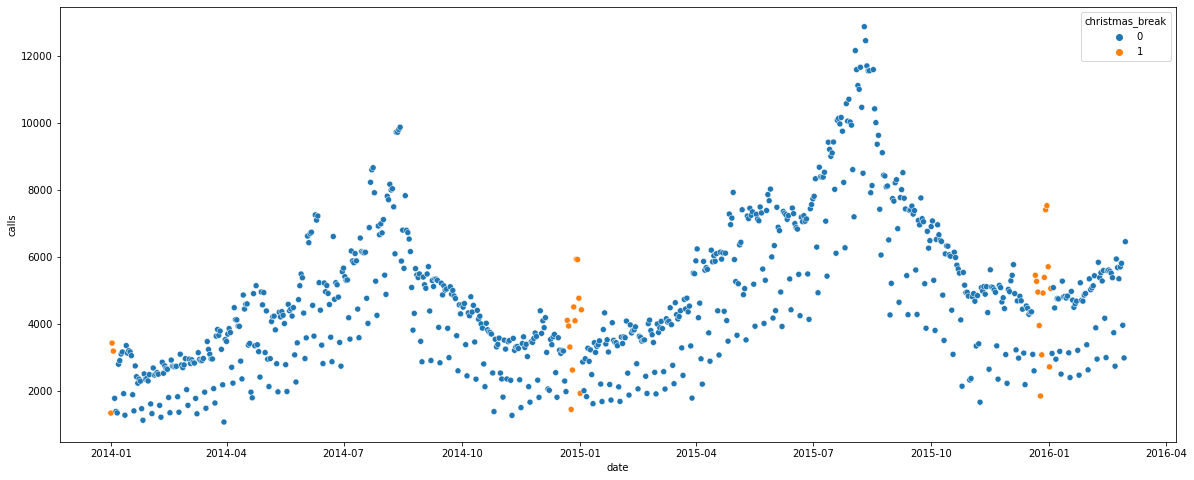

In [20]:
# Time series plot of the calls, colour by christmas_break
fig, ax6 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='date', y='calls', data=df, ax=ax6, hue='christmas_break')

The relationship between the number of calls and the breaks is similar to that of the relationship between the number of reservations and the breaks.

# Relationship between Calls and Reservations

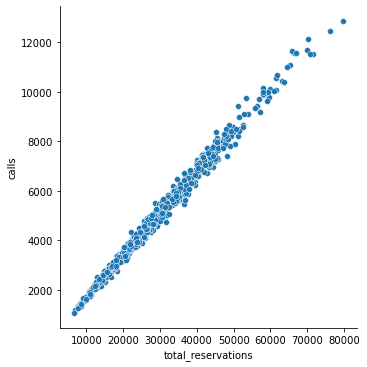

In [21]:
sns.relplot(x='total_reservations', y='calls', data=df)

There is a very clear, strong linear relationship between the number of calls and the total number of reservations. This points out the possible use of **Linear Regression** as a suitable predictive machine learning model to predict the number of calls made, which would aid in the staffing planning.

# Feature Selection & Engineering

## Correlations

Correlation matrices and heatmaps can be helpful to determine the features to be included in the linear regression model.

In [22]:
corr1 = df.corr()

<AxesSubplot:>

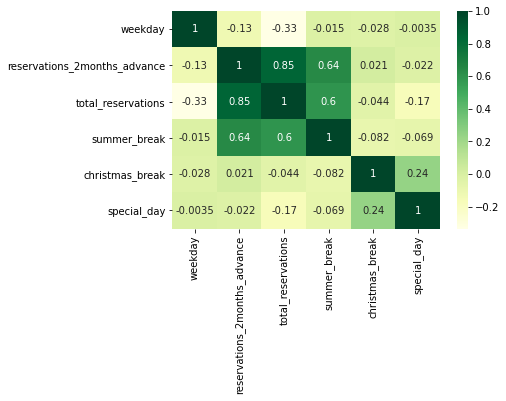

In [23]:
sns.heatmap(corr1.drop('calls', axis=0).drop('calls', axis=1), cmap='YlGn', annot=True)

As expected, there is a high correlation between `total_reservations` and `reservations_2months_advance` as mentioned before. 
As such, a new feature named `reservations_no_2months_advance` would be created which is equal to `total_reservations` - `reservations_2months_advance`.

In [24]:
df['reservations_no_2months_advance'] = df['total_reservations'] - df['reservations_2months_advance']
df.drop('total_reservations', axis=1, inplace=True)
df

,date,calls,weekday,reservations_2months_advance,summer_break,christmas_break,special_day,reservations_no_2months_advance
0,2014-01-01,1327,3,1494,0,1,1,6300
1,2014-01-02,3417,4,2891,0,1,0,17183
2,2014-01-03,3178,5,2790,0,1,0,15115
3,2014-01-04,1767,6,2504,0,0,0,8376
4,2014-01-05,1374,7,1522,0,0,0,6811
...,...,...,...,...,...,...,...,...
785,2016-02-25,5690,4,4713,0,0,0,28596
786,2016-02-26,5799,5,5204,0,0,0,29146
787,2016-02-27,3949,6,5135,0,0,0,18521
788,2016-02-28,2973,7,3422,0,0,0,14740


In [25]:
corr2 = df.corr()

<AxesSubplot:>

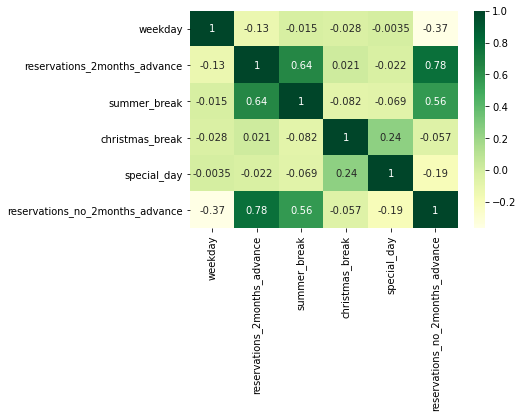

In [26]:
sns.heatmap(corr2.drop('calls', axis=0).drop('calls', axis=1), cmap='YlGn', annot=True)

There is a slight improvement by using `reservations_no_2months_advance` in place of `total_reservations`. We will keep to that.

<AxesSubplot:>

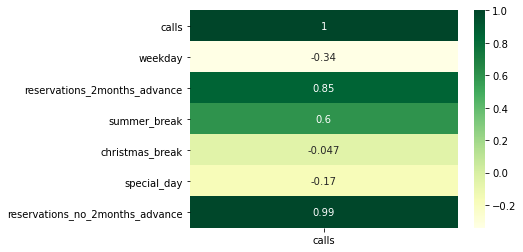

In [27]:
sns.heatmap(corr2[['calls']], cmap='YlGn', annot=True)

Looking at the correlations between the target variables `calls` and the other features, it seem like the features `christmas_break` and `special_day` can be dropped since the correlation is very low.

In [28]:
df = df.drop(['christmas_break', 'special_day'], axis=1)

In [29]:
df.head()

,date,calls,weekday,reservations_2months_advance,summer_break,reservations_no_2months_advance
0,2014-01-01,1327,3,1494,0,6300
1,2014-01-02,3417,4,2891,0,17183
2,2014-01-03,3178,5,2790,0,15115
3,2014-01-04,1767,6,2504,0,8376
4,2014-01-05,1374,7,1522,0,6811


## Indicators

The approach to employ has to be by avoiding incorporating future information as the features to be used during the prediction since these would not be available in the first place (i.e. using `reservations_2months_advance` to predict the `calls` in the future when the future `reservations_2months_advance` is not available in the first place).

The time series nature of the data means that we can generate indicators to make our model more accurate. For instance, we can create a new column that contains the average number of reservations with at least 2 months' advance period of the last 7 days. This will incorporate information from multiple prior rows into one, and will make predictions much more accurate. For the purposes of our predictive model, we would be employing the following four indicators to be created:

| New Column | Description |
| ---- | ---- |
| past_7_adv | The average number of reservations with at least 2 months' advance period from the past 7 days, exclusive of the number on the current date |
| past_30_adv | The average number of reservations with at least 2 months' advance period from the past 30 days, exclusive of the number on the current date |
| past_7_no_adv |  The average number of reservations without at least 2 months' advance period from the past 7 days, exclusive of the number on the current date |
| past_30_no_adv | The average number of reservations without at least 2 months' advance period from the past 30 days, exclusive of the number on the current date |

In [30]:
# Creating the indicators
past_7_adv = df.rolling(window=7)['reservations_2months_advance'].mean()
past_7_adv = past_7_adv.shift()
past_30_adv = df.rolling(window=30)['reservations_2months_advance'].mean()
past_30_adv = past_30_adv.shift()
past_7_no_adv = df.rolling(window=7)['reservations_no_2months_advance'].mean()
past_7_no_adv = past_7_no_adv.shift()
past_30_no_adv = df.rolling(window=30)['reservations_no_2months_advance'].mean()
past_30_no_adv = past_30_no_adv.shift()

In [31]:
# Sanity check to ensure accuracy
print(past_7_adv.isnull().sum())
print(past_7_no_adv.isnull().sum())
print(past_7_adv.head(10))
print(past_7_no_adv.head(10))

7
7
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7    2023.285714
8    2105.285714
9    1976.285714
Name: reservations_2months_advance, dtype: float64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7    10741.571429
8    12034.714286
9    11859.285714
Name: reservations_no_2months_advance, dtype: float64


In [32]:
# Sanity check to ensure accuracy
print(past_30_adv.isnull().sum())
print(past_30_no_adv.isnull().sum())
print(past_30_adv.head(35))
print(past_30_no_adv.head(35))

30
30
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30    2207.100000
31    2254.166667
32    2203.133333
33    2161.866667
34    2149.566667
Name: reservations_2months_advance, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16       

In [33]:
# Assigning back to the DataFrame

df['past_7_adv'] = past_7_adv
df['past_30_adv'] = past_30_adv
df['past_7_no_adv'] = past_7_no_adv
df['past_30_no_adv'] = past_30_no_adv

# Dropping the original columns used to construct these 4 indicators
df.drop(['reservations_2months_advance', 'reservations_no_2months_advance'], axis=1, inplace=True)


Since all 4 indicators are computed using historical data, there would be rows where there are null values due to insufficient historical data to compute. As such, all rows that fall before the date `2014-01-31` would be dropped since two of the indicators require 30 days' worth of historical data.

In [34]:
df.isnull().sum()

date               0
calls              0
weekday            0
summer_break       0
past_7_adv         7
past_30_adv       30
past_7_no_adv      7
past_30_no_adv    30
dtype: int64

In [35]:
# Dropping rows with null values
df.dropna(axis=0, inplace=True)
# Resetting the index
df.reset_index(inplace=True, drop=True)

In [36]:
df.isnull().sum()

date              0
calls             0
weekday           0
summer_break      0
past_7_adv        0
past_30_adv       0
past_7_no_adv     0
past_30_no_adv    0
dtype: int64

In [37]:
df.head(10)

,date,calls,weekday,summer_break,past_7_adv,past_30_adv,past_7_no_adv,past_30_no_adv
0,2014-01-31,2477,5,0,2334.571429,2207.100000,9527.571429,11558.466667
1,2014-02-01,1600,6,0,2429.142857,2254.166667,9514.428571,11710.233333
2,2014-02-02,1310,7,0,2273.428571,2203.133333,9863.571429,11408.733333
3,2014-02-03,2673,1,0,2297.571429,2161.866667,10026.285714,11113.666667
4,2014-02-04,2460,2,0,2153.428571,2149.566667,10290.428571,11276.666667
5,2014-02-05,2491,3,0,2113.000000,2172.400000,10472.714286,11437.400000
6,2014-02-06,2534,4,0,2198.428571,2228.100000,10381.857143,11604.600000
7,2014-02-07,2487,5,0,2118.571429,2229.333333,10627.857143,11531.933333
8,2014-02-08,1556,6,0,2016.571429,2233.466667,10745.285714,11409.366667
9,2014-02-09,1203,7,0,2064.428571,2223.700000,10629.000000,11121.666667


In [38]:
df.tail(10)

,date,calls,weekday,summer_break,past_7_adv,past_30_adv,past_7_no_adv,past_30_no_adv
750,2016-02-20,3726,6,0,4218.000000,4495.333333,24805.285714,22619.200000
751,2016-02-21,2726,7,0,4152.000000,4496.766667,24117.571429,22437.266667
752,2016-02-22,5927,1,0,3947.000000,4419.566667,24130.285714,22083.600000
753,2016-02-23,5670,2,0,3879.714286,4426.933333,24556.285714,22618.666667
754,2016-02-24,5337,3,0,3995.142857,4489.800000,24382.714286,23137.033333
755,2016-02-25,5690,4,0,4082.285714,4494.400000,23977.000000,23186.100000
756,2016-02-26,5799,5,0,4114.857143,4516.333333,24162.285714,23367.433333
757,2016-02-27,3949,6,0,4358.714286,4618.933333,24186.857143,23474.066667
758,2016-02-28,2973,7,0,4416.571429,4672.600000,24608.857143,23317.033333
759,2016-02-29,6444,1,0,4643.571429,4620.700000,24754.571429,23054.366667


With that, our data is now ready to build the predictive model using linear regression for predicting the number of calls.

# Building the Model

## Train-Test Split

Since we are dealing with a time series data, we would not be able to do a typical cross-validation so as to avoid incorporating future information when training the model. Instead, we would split the data into a training and test set based on the dates. We would be training the model on historical data from before 2015-9-1 and testing the model on historical data from after 2015-9-1. This would achieve 

In [39]:
train = df[df['date'] < dt(2015,9,1)]
train.shape

(578, 8)

In [40]:
test = df[df['date'] >= dt(2015,9,1)]
test.shape

(182, 8)

## Fitting and Evaluating

With the train and test sets created, we can proceed to create, fit, make predictions and evaluate a linear regression model.To evaluate our model, the root mean squared error (RMSE) would be an ideal error metric as it ignores the sign of the errors and also penalising errors by squaring. Furthermore, by square rooting, the error metric would be measured in the same, original units.

In [41]:
# Importing the LinearRegression and mean_squared_error class from sci-kit learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
# Instantiate a Linear Regression model, using the default parameters
model = LinearRegression()

In [43]:
# Setting up the list of features and the target
features = ['weekday', 'summer_break', 'past_7_adv', 'past_30_adv', 'past_7_no_adv', 'past_30_no_adv']
target = 'calls'

In [44]:
# Fitting the model
model.fit(train[features], train[target])

# Making predictions on the test set
predictions = model.predict(test[features])

In [45]:
# Computing the RMSE for the test set
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 897.1958666417694


In [46]:
R_squared = model.score(test[features], test[target])
print('R-Squared: {}'.format(R_squared))

R-Squared: 0.6282213663350091


# Model Implementation Feasibility

Overall, the model achieves a RMSE of approximately 897 number of calls, which is moderately high with a moderate coefficient of determination (R-squared) of around 0.63. That is, the model is still not yet feasible to be implemented in the call center and put to production for use since the model is still performing moderately poor. This could be attributed to the following factors:

* Insufficient historical data, with only 790 rows for both training and testing
* Insufficient features - `weekday` and `summer_break` are categorical in nature and the four indicator features are created from only two original features `total_reservations` and `reservations_2months_advance`

A key limitation of this model to note is that the indicators would require the past 7 and past 30 days' worth of running data, which would mean that the model can only be used to predict the number of calls **only one day into the future**. The reason being that it is necessary to obtain the actual number of reservations up to the current date in order to calculate out the indicators which would serve as inputs to the model. One plausible solution is to integrate a forecasting model for number of reservations in the future and the forecasted numbers would be used to calculate out the indicators before being fed into the model for predicting the number of calls.

Moving forward, the following could help to improve the model:
* Since MI.com has more than 10 years of experience, expand the dataset to include more years of data. Alternatively, breaking the data down into hourly instead of a daily basis to artifically increase the dataset size.
* Increase the granularity of the data, if available, such as the total duration of all the calls in a day. This would account for varying duration of each phone call which should be the focus instead of the number of calls.
* Providing more relevant information about the date in consideration. For example, whether there is any running booking promotion or possible natural disasters/unrest around the world which could cause a spike in number of calls.

Predicting the number of calls is only one part of the equation. No data is provided on the call center's current staffing level and the efficiency of call center operators such as being able to answer how many calls within a time period. Hence, staffing information is also required to help manage the staffing planning to ensure the call center is duly staffed to handle the call volumes.